# Building Trees using scikit-learn - Lab

## Introduction
Following the toy example we saw in the previous lesson, we shall now grow a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice , from data acquisition to evaluation of results. We shall use scikit learn, pandas and graphviz libraries to conduct this analysis following the example of play tennis dataset.

## Objectives

You will be able to:

- Use pandas to prepare the data for the scikit-learn decision tree algorithm
- Train the classifier with a training dataset and evaluate performance using different measures
- Visualize the decision tree and interpret the visualization

## UCI Banknote Authentication Data Set

In this lab we shall work with a popular dataset for classification called the ["UCI Bank Note Authentication Dataset'](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). This Data were extracted from images that were taken from genuine and forged banknote-like specimens. The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature (visit the UCI link to learn about feature engineering in detail). 

We have following attributes in the dataset. 

1. __Variance__ of Wavelet Transformed image (continuous) 
2. __Skewness__ of Wavelet Transformed image (continuous) 
3. __Curtosis__ of Wavelet Transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import necessary Libraries
- Import necessary libraries as we saw in previous lesson

In [1]:
# Import necessary libraries

!pip install seaborn
!pip install pydotplus
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 286kB 19.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/Botafogo1894/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Step 2: Import Data
- Read the file `"data_banknote_authentication.csv"` as a pandas dataframe. Note that there is no header information in this dataset.
- Assign column names 'Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class' to dataset in the given order.
- View the basic statistics and shape of dataset.
- Check for frequency of positive and negative examples in the target variable

In [2]:
# Create Dataframe
df = pd.read_csv("data_banknote_authentication.csv")
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

df.info()
df.Class.value_counts()
X = df[df.columns[:-1]]
y = df.Class
## Your code here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
Variance    1371 non-null float64
Skewness    1371 non-null float64
Curtosis    1371 non-null float64
Entropy     1371 non-null float64
Class       1371 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.6 KB


In [4]:
# Describe the dataset
X.head()
## Your code here 

,Variance,Skewness,Curtosis,Entropy
0,4.54590,8.1674,-2.4586,-1.46210
1,3.86600,-2.6383,1.9242,0.10645
2,3.45660,9.5228,-4.0112,-3.59440
3,0.32924,-4.4552,4.5718,-0.98880
4,4.36840,9.6718,-3.9606,-3.16250


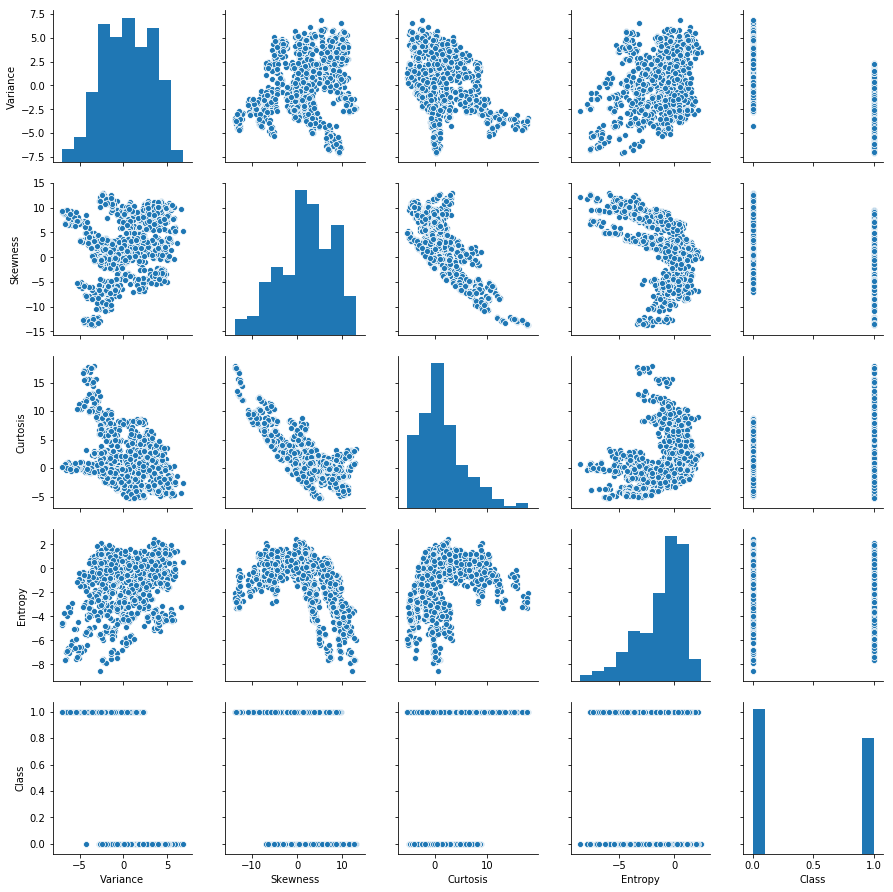

In [3]:
# Shape of dataset
sns.pairplot(df)
## Your code here 

In [5]:
# Class frequency of target variable 
y.value_counts()
## Your code here 

0    761
1    610
Name: Class, dtype: int64

In [30]:
## Your Observations 



## Step 3: Create Features and Labels, Training and Test Data

So now we need to create our feature set X and labels y. 
- Create X and y by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/testing. Use random_state=10 for reproducibility

In [13]:
# Create features and labels

## Your code here 

In [6]:
# Perform an 80/20 split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)  
## Your code here 

## Step 4: Train the Classifier and Make PRedictions
- Create an instance of decision tree classifier with random_state=10 for reproducibility
- Fit the traiing data to the model 
- USe the trained model to make predictions with test data

In [7]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 
## Your code here 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [8]:
# Make predictions for test data
y_hat_test = classifier.predict(X_test)
## Your code here 
X_train.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

## Step 5: Check Predictive Performance

We can now use different evaluation measures to check the predictive performance of the classifier. 
- Check the accuracy , AUC and create a confusion matrix 
- Interpret the results 

In [9]:
# Calculate Accuracy , AUC and Confusion matrix 

# Calculate Accuracy , AUC and Confusion matrix 
acc = accuracy_score(y_test,y_hat_test) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_hat_test, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :98.54545454545455

AUC is :0.99

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,152,4,156
1,0,119,119
All,152,123,275


In [10]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       156
           1       0.97      1.00      0.98       119

   micro avg       0.99      0.99      0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## Step 6: Visualize the tree 

- Use graphviz to visualize the tree 
- Interpret the results 

In [11]:
# Visualize the tree trained from complete dataset

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
## Your observations here


## Bonus: Re-grow the Tree Using Entropy 

SO in the above example, we used all default settings for decision tree classifier. The default impurity crietrion in scikit learn is the Gini impurity. We can change it back to entropy by passing in `criterion='entropy'` argument to the classifier in the training phase. 
- Repeat the above tasks for training, evaluation and visualization using Entropy measure. (
- Compare and interpret the results 

Accuracy is :99.63636363636364

AUC is :1.0

Confusion Matrix
----------------
Predicted    0    1  All
True                    
0          151    1  152
1            0  123  123
All        151  124  275


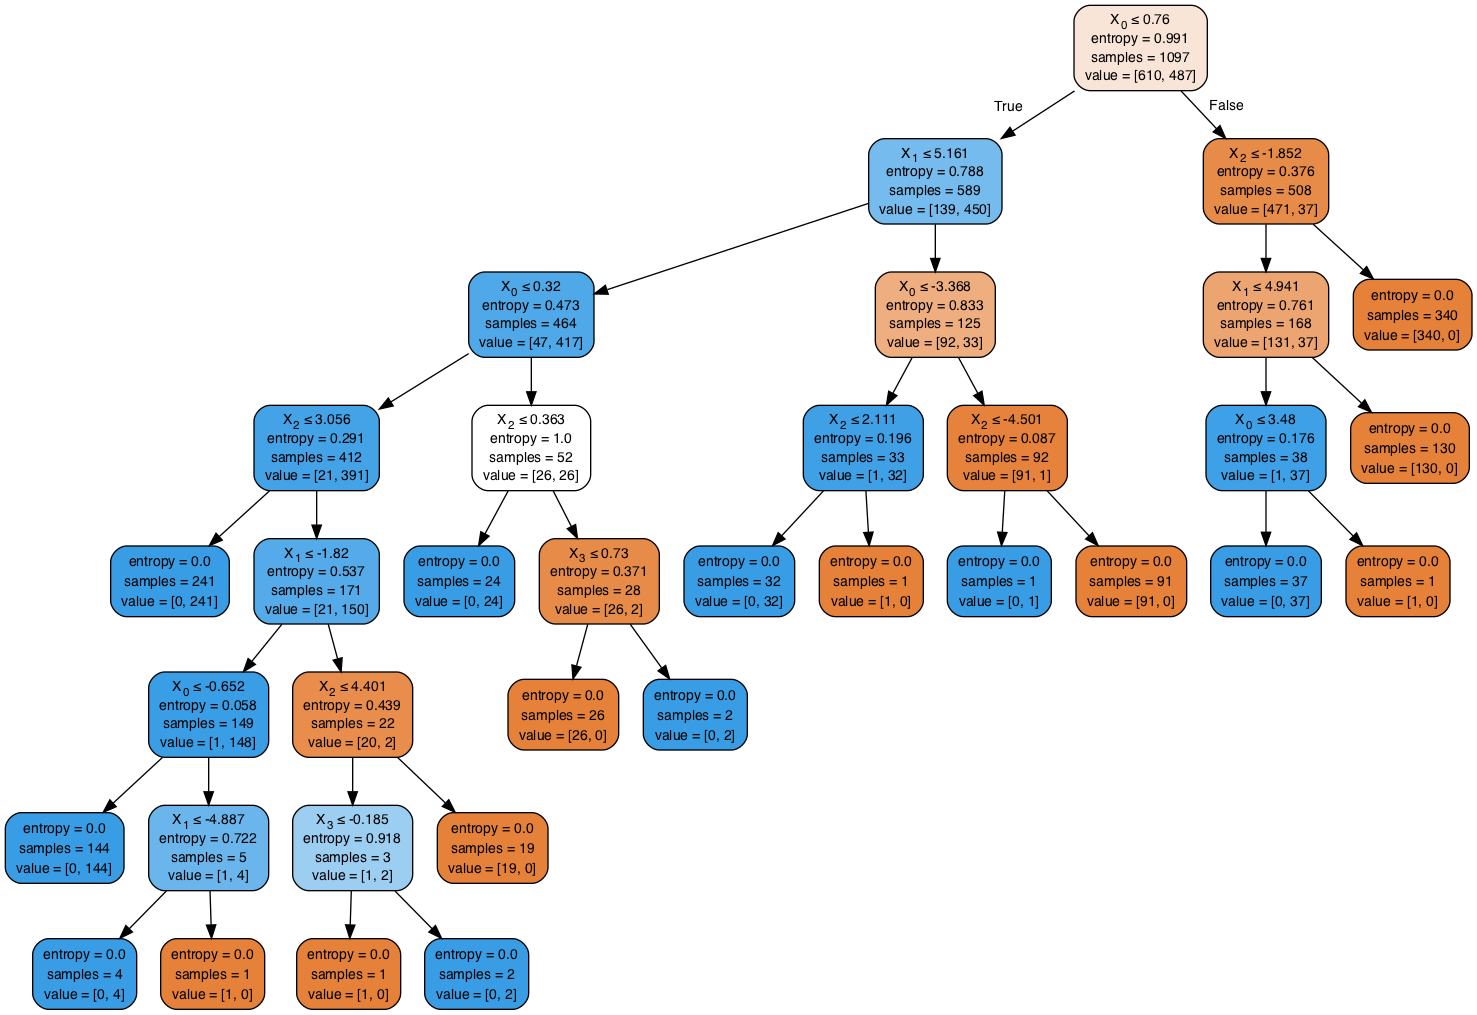

In [48]:


## Your code here 



In [49]:
# Your observations here 

# With entropy we see a much lower accuracy and AUC than earlier
# Only one false positive value , leading to accuracy of 99%
# The tree shape changes considerably with change in impurity criteria 

## Level up - Optional 

- We discussed earlier that decision trees are very sensitive towards outliers. Try to identify and remove/fix any possible outliers in the dataset. 
- Check the distributions of the data. Is there any room for normalization/scaling of data ? Apply these techiques and see if it improves upon accuracy score. 

## Summary 

In this lesson, we looked at growing a decision tree for banknote authentication dataset which is composed of extracted continuous features from photographic data. We looked at different stages of the experiment including data acquisition, training, prediction and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at some more such pre-train tuning techniques for ensuring an optimal classifier for learning and prediction.  